CSCE 636 Homework 2-1 Movie Review classification

In [1]:
# import imdb dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
# preparing the data
# one-hot encode, vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
  

In [0]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.5048 - acc: 0.7872 - val_loss: 0.3774 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2991 - acc: 0.9049 - val_loss: 0.3002 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2173 - acc: 0.9282 - val_loss: 0.3081 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1747 - acc: 0.9438 - val_loss: 0.2826 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1422 - acc: 0.9540 - val_loss: 0.2855 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1148 - acc: 0.9653 - val_loss: 0.3140 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3131 - 

In [9]:
# a dictionary containing data about everything that happened during training
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']

epochs = range(1, len(acc) + 1)

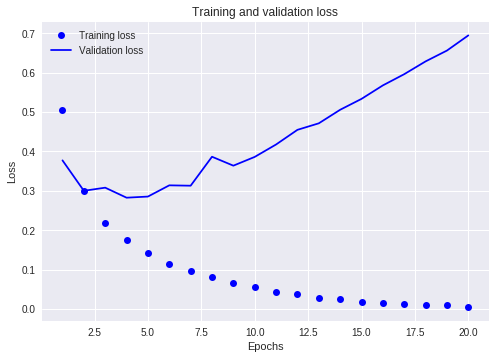

In [11]:
# plot the training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

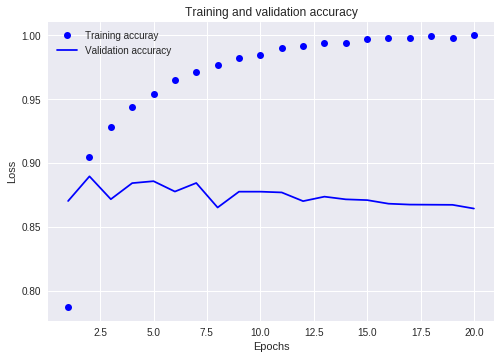

In [12]:
# plot the training and validation accuracy
plt.clf()
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuray')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# reduce the epochs and retrain the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4733 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2671 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2032 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.1716 - acc: 0.9386


In [14]:
# training and test performance
(train_loss, train_acc) = model.evaluate(x_train, y_train)
(test_loss, test_acc) = model.evaluate(x_test, y_test)

print("train loss: ", train_loss)
print("train accuracy: ", train_acc)

print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

25000/25000 [==============================] - 2s 68us/step
train loss:  0.14699044765949248
train accuracy:  0.95
test loss:  0.3115376090812683
test accuracy:  0.87616


In [15]:
# add one more layer and retrain the model
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.4534 - acc: 0.8150
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2539 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.1948 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.1650 - acc: 0.9401


In [16]:
# training and test performance
(train_loss2, train_acc2) = model2.evaluate(x_train, y_train)
(test_loss2, test_acc2) = model2.evaluate(x_test, y_test)

print("train loss: ", train_loss2)
print("train accuracy: ", train_acc2)

print("test loss: ", test_loss2)
print("test accuracy: ", test_acc2)

25000/25000 [==============================] - 2s 68us/step
train loss:  0.1251910840201378
train accuracy:  0.95936
test loss:  0.30279565120220187
test accuracy:  0.88256
